In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 5.1 Spectrometer Measurement

#### a) Room Light Off

In [3]:
# Read the file into a DataFrame
light_off = pd.read_csv("KoenRiana_lightOff.txt", skiprows=1, sep="\t", names=["wavelength (nm)", "Dark current counts", "Counts"])
light_off

,wavelength (nm),Dark current counts,Counts
0,208.295,639.4,634.4
1,208.670,550.6,555.6
2,209.045,515.6,521.4
3,209.419,510.0,509.4
4,209.794,584.2,585.0
...,...,...,...
2043,1129.520,530.8,524.4
2044,1129.890,526.8,529.2
2045,1130.260,527.2,523.4
2046,1130.640,525.4,526.0


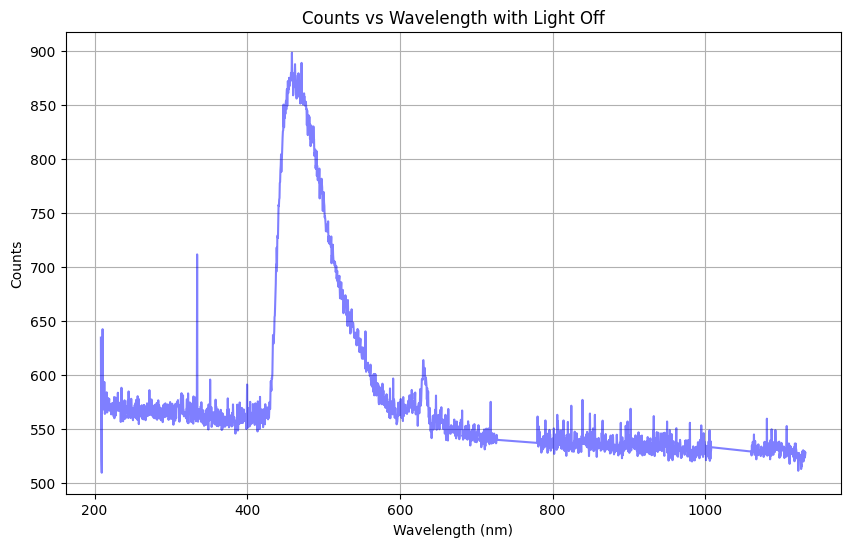

In [4]:
# First plot the counts only against wavelength
plt.figure(figsize=(10, 6))
sns.lineplot(data=light_off, x="wavelength (nm)", y="Counts", color="blue", alpha=0.5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title("Counts vs Wavelength with Light Off")
plt.grid()
plt.show()

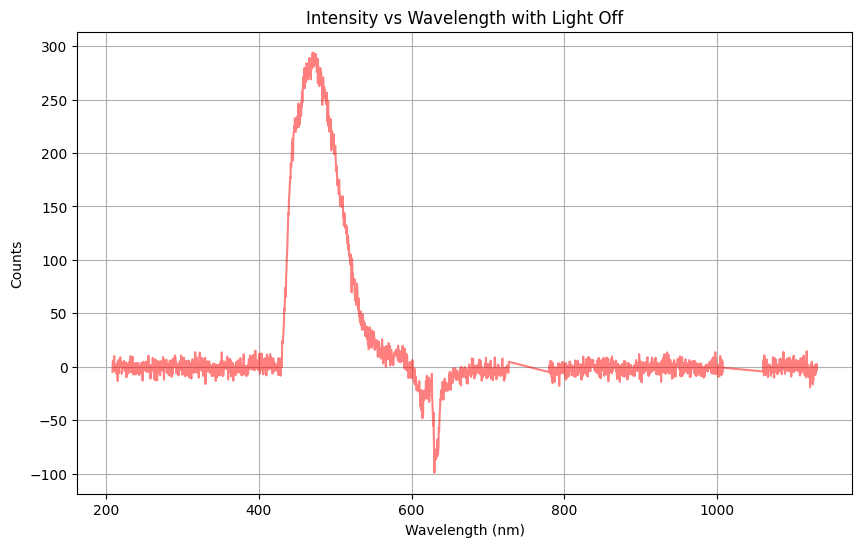

In [5]:
# Now we plot the dark counts substracted from the counts against wavelength
intensity = light_off["Counts"] - light_off["Dark current counts"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=light_off, x="wavelength (nm)", y=intensity, color="red", alpha=0.5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title("Intensity vs Wavelength with Light Off")
plt.grid()
plt.show()

#### b) Room Light On

In [6]:
# Read the file into a DataFrame
light_on = pd.read_csv("KoenRiana_lightOn.txt", skiprows=1, sep="\t", names=["wavelength (nm)", "Dark current counts", "Counts"])
light_on

,wavelength (nm),Dark current counts,Counts
0,208.295,638.8,642.2
1,208.670,555.6,550.6
2,209.045,520.2,518.2
3,209.419,516.2,511.4
4,209.794,592.2,592.6
...,...,...,...
2043,1129.520,570.0,571.2
2044,1129.890,573.6,569.0
2045,1130.260,569.0,558.6
2046,1130.640,564.6,565.0


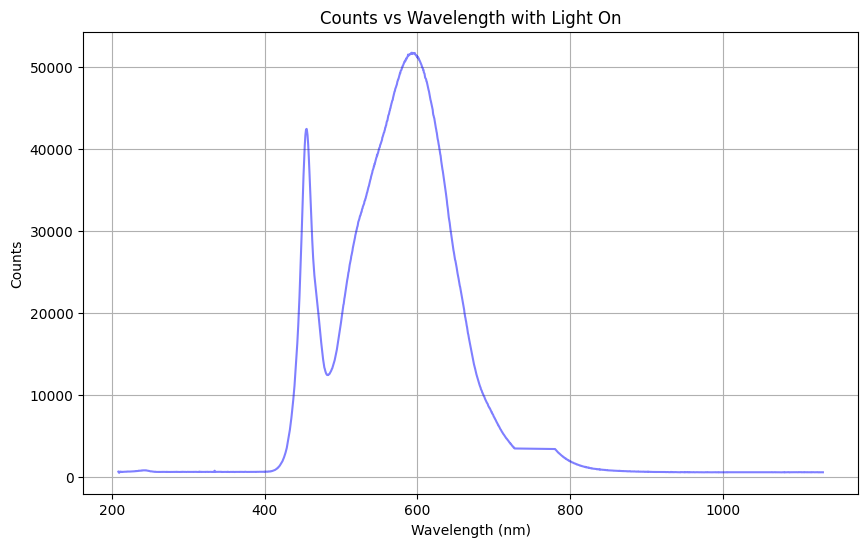

In [7]:
# First plot the counts only against wavelength
plt.figure(figsize=(10, 6))
sns.lineplot(data=light_on, x="wavelength (nm)", y="Counts", color="blue", alpha=0.5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title("Counts vs Wavelength with Light On")
plt.grid()
plt.show()

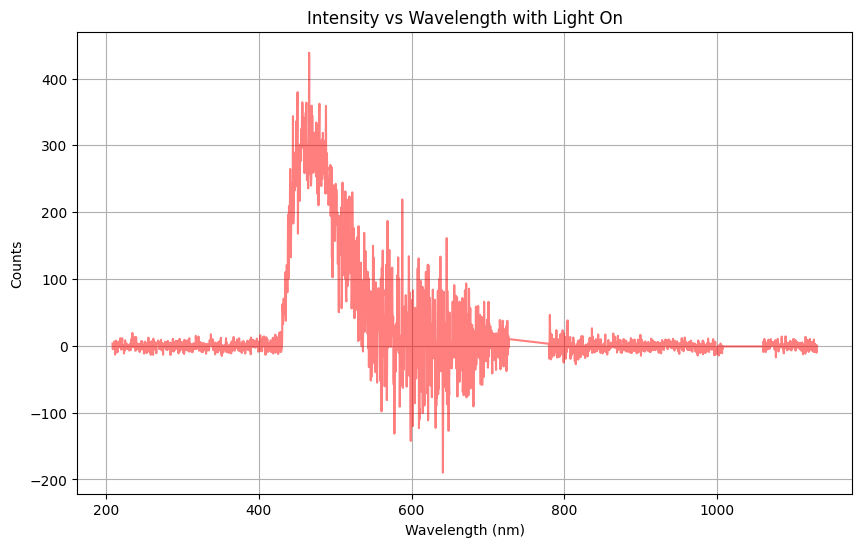

In [9]:
# Now we plot the dark counts substracted from the counts against wavelength
intensity = light_on["Counts"] - light_on["Dark current counts"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=light_on, x="wavelength (nm)", y=intensity, color="red", alpha=0.5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title("Intensity vs Wavelength with Light On")
plt.grid()
plt.show()

## 5.2 Radial Symmetry  
In this measurement, the radial symmetry of the light intensity is to be verified.   
To do this, the light intensity is recorded for different angles with a fixed excitation position.  
The horizontal angles cover a range from -18° to 30° and the vertical angles a range from -6° to 35°.  
The intensity is displayed in a two-dimensional histogram.

In [8]:
# First we loop over all attenuation files and sum them to get only one DataFrame

import os

radial_folder = "KoenRiana_radial"
file_name = os.path.join(radial_folder, "Attenuation_h=*.txt")

# Get only the files that match the file name

import glob

file_list = glob.glob(file_name)

radial_intensity = None

for file in file_list:
    df = pd.read_csv(file, skiprows=1, sep="\t", names=["wavelength (nm)", "Counts"])
    df["vert_angle"] = float(file.split("_")[3].split("deg")[0][2:])
    df["hor_angle"] = float(file.split("_")[2].split("deg")[0][2:])
    df_dark_counts_file = file.replace("Attenuation", "DarkCounts")
    df_dark_counts_file = df_dark_counts_file.replace("_x=0mm.txt", ".txt")
    df_dark_counts = pd.read_csv(df_dark_counts_file, skiprows=1, sep="\t", names=["wavelength (nm)", "Dark counts"])
    df["Dark counts"] = df_dark_counts["Dark counts"]
    radial_intensity = pd.concat([radial_intensity, df], ignore_index=True) if radial_intensity is not None else df

radial_intensity

,wavelength (nm),Counts,vert_angle,hor_angle,Dark counts
0,208.295,576.8,-6.0,-14.8,578.2
1,208.670,500.4,-6.0,-14.8,500.8
2,209.045,467.0,-6.0,-14.8,463.2
3,209.419,465.2,-6.0,-14.8,460.8
4,209.794,575.8,-6.0,-14.8,567.2
...,...,...,...,...,...
460795,1129.520,550.0,-3.3,26.8,542.6
460796,1129.890,550.0,-3.3,26.8,555.8
460797,1130.260,533.0,-3.3,26.8,540.8
460798,1130.640,536.0,-3.3,26.8,541.0


In [9]:
to_plot_radial = radial_intensity.copy()
to_plot_radial["Counts"] = radial_intensity["Counts"] - radial_intensity["Dark counts"]
to_plot_radial = to_plot_radial.drop(columns=["Dark counts"])
to_plot_radial = to_plot_radial.groupby(["hor_angle", "vert_angle"]).sum().reset_index()
to_plot_radial = to_plot_radial.drop(columns = ["wavelength (nm)"])

In [10]:
to_plot_radial

,hor_angle,vert_angle,Counts
0,-18.0,-6.0,41998.0
1,-18.0,-3.3,41943.6
2,-18.0,-0.6,42245.6
3,-18.0,2.1,42782.2
4,-18.0,4.8,42942.6
...,...,...,...
220,26.8,21.0,44795.0
221,26.8,23.7,41867.2
222,26.8,26.4,40654.6
223,26.8,29.1,36838.0


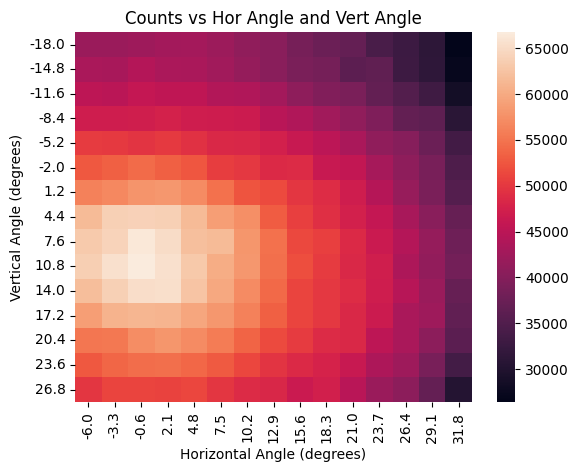

In [11]:
sns.heatmap(data=to_plot_radial.pivot(index="hor_angle", columns="vert_angle", values="Counts"), cmap="rocket")
plt.title("Counts vs Hor Angle and Vert Angle")
plt.xlabel("Horizontal Angle (degrees)")
plt.ylabel("Vertical Angle (degrees)")
plt.show()

## 5.3 Simulation

In [12]:
sim_data = pd.read_pickle("SimData.pkl")
sim_data

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12190,-0.046607,0.029443,199.925171,-0.036812,-0.031668,0.951252,-0.265641,-0.156699,296.0,0.0,477.273438,200.0,210.170227,0.000000,0.0
12191,0.106568,0.010214,200.010742,-0.091458,-0.051768,0.856789,0.352222,-0.376632,1475.0,0.0,452.089111,200.0,233.438522,0.000000,0.0
12192,0.080448,-0.062861,200.003174,0.107887,-0.000503,0.994160,-0.050281,0.095482,197.0,0.0,434.581573,200.0,201.177856,0.000000,0.0
12193,-0.006622,0.073915,200.003418,-0.054177,-0.022690,0.925610,0.245599,0.287970,0.0,262.0,492.808777,200.0,162.236069,50.216526,0.0


### 1)

We first determine the distance between the exit point and the center of the fiber.
This value must not exceed the radius of the fiber, which is 125 µm.

In [13]:
sim_data["distance_to_center"] = np.sqrt(sim_data["# y_exit"]**2 + sim_data["z_exit"]**2)

In [14]:
sim_data.describe()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center
count,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07,1.179525e+07
mean,-5.264910e-04,-8.950823e-04,1.159524e+03,-5.309090e-04,-9.224971e-04,8.968612e-01,7.759757e-05,-6.799344e-05,2.345844e+03,8.751003e+02,4.860855e+02,1.160290e+03,1.224073e+03,7.140700e+01,2.813048e-02,1.173163e-01
std,1.092816e-01,1.066932e-01,6.926804e+02,9.551301e-02,9.275482e-02,2.016090e-01,2.783626e-01,2.784028e-01,1.033743e+04,1.772879e+03,3.906684e+01,6.923159e+02,8.721731e+02,1.472979e+02,1.724887e-01,9.779507e-02
min,-3.738893e+00,-1.577247e+00,7.324200e-04,-9.344814e-01,-7.362685e-01,-9.999983e-01,-9.999517e-01,-9.999584e-01,0.000000e+00,0.000000e+00,3.964916e+02,1.000000e+02,7.887900e-04,0.000000e+00,0.000000e+00,1.991677e-05
25%,-5.746580e-02,-5.632250e-02,5.307371e+02,-5.428825e-02,-5.338112e-02,8.857759e-01,-2.195721e-01,-2.199078e-01,0.000000e+00,0.000000e+00,4.567849e+02,6.000000e+02,5.687816e+02,0.000000e+00,0.000000e+00,6.742747e-02
50%,-1.196200e-04,-1.272950e-04,1.100007e+03,-1.136050e-04,-1.452150e-04,9.242285e-01,8.204500e-05,-1.254100e-04,9.220000e+02,0.000000e+00,4.784831e+02,1.100000e+03,1.152548e+03,0.000000e+00,0.000000e+00,9.148361e-02
75%,5.729824e-02,5.606827e-02,1.700230e+03,5.405836e-02,5.305622e-02,9.622661e-01,2.198566e-01,2.198126e-01,2.677000e+03,1.032000e+03,5.072234e+02,1.700000e+03,1.806906e+03,7.959639e+01,0.000000e+00,1.088383e-01
max,2.996887e+00,2.268442e+00,2.499997e+03,7.972623e-01,5.273797e-01,1.000000e+00,9.999921e-01,9.999799e-01,2.824994e+06,1.252775e+06,6.525353e+02,2.400000e+03,1.012586e+05,7.987663e+04,5.000000e+00,3.774429e+00


We only keep the distances that are smaller than 125 µm, as the rest is unphysical.

In [15]:
sim_data = sim_data[sim_data["distance_to_center"] < 0.125]

In [16]:
sim_data.describe()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center
count,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06,9.713545e+06
mean,-9.954116e-06,1.494805e-05,1.159427e+03,-2.788264e-05,-7.820678e-06,8.984534e-01,1.053778e-04,-2.845746e-05,2.236195e+03,8.821924e+02,4.860495e+02,1.160167e+03,1.219977e+03,7.200372e+01,2.722991e-02,7.882350e-02
std,5.868686e-02,5.869388e-02,6.926711e+02,5.636046e-02,5.635617e-02,1.993814e-01,2.766131e-01,2.766113e-01,9.884191e+03,1.740615e+03,3.907549e+01,6.923317e+02,8.592050e+02,1.465545e+02,1.696342e-01,2.599953e-02
min,-1.194676e-01,-1.197546e-01,7.324200e-04,-3.218422e-01,-1.727553e-01,-9.999983e-01,-9.999517e-01,-9.999584e-01,0.000000e+00,0.000000e+00,4.072033e+02,1.000000e+02,7.887900e-04,0.000000e+00,0.000000e+00,1.991677e-05
25%,-4.862919e-02,-4.859848e-02,5.257590e+02,-4.648589e-02,-4.643746e-02,8.870850e-01,-2.183774e-01,-2.186445e-01,0.000000e+00,0.000000e+00,4.567442e+02,6.000000e+02,5.665295e+02,0.000000e+00,0.000000e+00,6.164743e-02
50%,-2.933000e-05,1.499000e-05,1.100005e+03,-2.875000e-05,4.730000e-06,9.250237e-01,8.039000e-05,-6.700000e-05,8.800000e+02,0.000000e+00,4.784474e+02,1.100000e+03,1.149844e+03,0.000000e+00,0.000000e+00,8.415024e-02
75%,4.862333e-02,4.865370e-02,1.700133e+03,4.640057e-02,4.643286e-02,9.626671e-01,2.187314e-01,2.186553e-01,2.587000e+03,1.083000e+03,5.071874e+02,1.700000e+03,1.803728e+03,8.378591e+01,0.000000e+00,1.001615e-01
max,1.174933e-01,1.214944e-01,2.499991e+03,1.099974e-01,1.779337e-01,1.000000e+00,9.999921e-01,9.999766e-01,2.824994e+06,1.252775e+06,6.525353e+02,2.400000e+03,9.886555e+04,7.987663e+04,5.000000e+00,1.239877e-01


We then only keep the photons that have caused Rayleigh scattering.

In [17]:
sim_data = sim_data[sim_data["rayleighScatterings"] == 0]

In [18]:
sim_data.describe()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center
count,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9459578.0,9.459578e+06
mean,-7.996403e-06,1.601901e-05,1.157522e+03,-2.935201e-05,-5.063339e-06,9.211157e-01,1.035213e-04,-2.103688e-05,1.867709e+03,8.695838e+02,4.862491e+02,1.158279e+03,1.184615e+03,7.101865e+01,0.0,7.872050e-02
std,5.862076e-02,5.862995e-02,6.928797e+02,5.620029e-02,5.619299e-02,5.214453e-02,2.727548e-01,2.728215e-01,3.218881e+03,1.662763e+03,3.920767e+01,6.925389e+02,7.187201e+02,1.420225e+02,0.0,2.601821e-02
min,-1.194676e-01,-1.197546e-01,7.324200e-04,-1.099965e-01,-1.099951e-01,6.934283e-01,-7.200497e-01,-7.194198e-01,0.000000e+00,0.000000e+00,4.072033e+02,1.000000e+02,7.887900e-04,0.000000e+00,0.0,1.991677e-05
25%,-4.853981e-02,-4.851382e-02,5.001513e+02,-4.632517e-02,-4.627013e-02,8.890090e-01,-2.172630e-01,-2.175091e-01,0.000000e+00,0.000000e+00,4.568260e+02,5.000000e+02,5.478698e+02,0.000000e+00,0.0,6.150019e-02
50%,-2.839500e-05,1.544500e-05,1.100004e+03,-2.883000e-05,2.115000e-06,9.262220e-01,6.955500e-05,-6.974000e-05,8.420000e+02,0.000000e+00,4.786551e+02,1.100000e+03,1.128358e+03,0.000000e+00,0.0,8.400955e-02
75%,4.853876e-02,4.857176e-02,1.700079e+03,4.623801e-02,4.627260e-02,9.632697e-01,2.175971e-01,2.175693e-01,2.508000e+03,1.051000e+03,5.074903e+02,1.700000e+03,1.774441e+03,8.112438e+01,0.0,1.000720e-01
max,1.174933e-01,1.214944e-01,2.499991e+03,1.099974e-01,1.099936e-01,1.000000e+00,7.189832e-01,7.199790e-01,1.175689e+06,1.464100e+04,6.525353e+02,2.400000e+03,3.188698e+03,2.042911e+03,0.0,1.239877e-01


### 2)

We now calculate the angle theta of the photon to the x-axis (fiber) from the momentum vector of the photon.

In [19]:
sim_data["theta"] = np.arccos(sim_data["px_start"])

In [20]:
sim_data.describe()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center,theta
count,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9.459578e+06,9459578.0,9.459578e+06,9.459578e+06
mean,-7.996403e-06,1.601901e-05,1.157522e+03,-2.935201e-05,-5.063339e-06,9.211157e-01,1.035213e-04,-2.103688e-05,1.867709e+03,8.695838e+02,4.862491e+02,1.158279e+03,1.184615e+03,7.101865e+01,0.0,7.872050e-02,3.741850e-01
std,5.862076e-02,5.862995e-02,6.928797e+02,5.620029e-02,5.619299e-02,5.214453e-02,2.727548e-01,2.728215e-01,3.218881e+03,1.662763e+03,3.920767e+01,6.925389e+02,7.187201e+02,1.420225e+02,0.0,2.601821e-02,1.443952e-01
min,-1.194676e-01,-1.197546e-01,7.324200e-04,-1.099965e-01,-1.099951e-01,6.934283e-01,-7.200497e-01,-7.194198e-01,0.000000e+00,0.000000e+00,4.072033e+02,1.000000e+02,7.887900e-04,0.000000e+00,0.0,1.991677e-05,0.000000e+00
25%,-4.853981e-02,-4.851382e-02,5.001513e+02,-4.632517e-02,-4.627013e-02,8.890090e-01,-2.172630e-01,-2.175091e-01,0.000000e+00,0.000000e+00,4.568260e+02,5.000000e+02,5.478698e+02,0.000000e+00,0.0,6.150019e-02,2.718727e-01
50%,-2.839500e-05,1.544500e-05,1.100004e+03,-2.883000e-05,2.115000e-06,9.262220e-01,6.955500e-05,-6.974000e-05,8.420000e+02,0.000000e+00,4.786551e+02,1.100000e+03,1.128358e+03,0.000000e+00,0.0,8.400955e-02,3.865319e-01
75%,4.853876e-02,4.857176e-02,1.700079e+03,4.623801e-02,4.627260e-02,9.632697e-01,2.175971e-01,2.175693e-01,2.508000e+03,1.051000e+03,5.074903e+02,1.700000e+03,1.774441e+03,8.112438e+01,0.0,1.000720e-01,4.756201e-01
max,1.174933e-01,1.214944e-01,2.499991e+03,1.099974e-01,1.099936e-01,1.000000e+00,7.189832e-01,7.199790e-01,1.175689e+06,1.464100e+04,6.525353e+02,2.400000e+03,3.188698e+03,2.042911e+03,0.0,1.239877e-01,8.045600e-01


### 3) Done mathematically

### 4)

We now separate the core and cladding photons.
Assuming core means no length_clad, and cladding means length_clad > 0.

In [21]:
sim_data_core = sim_data[sim_data["length_clad"] == 0]
sim_data_clad = sim_data[sim_data["length_clad"] > 0]

In [22]:
sim_data_core.describe()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center,theta
count,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6434718.0,6.434718e+06,6.434718e+06,6.434718e+06,6434718.0,6434718.0,6.434718e+06,6.434718e+06
mean,-1.910724e-05,8.134303e-06,1.154402e+03,-4.017756e-05,1.102430e-05,9.404961e-01,1.235615e-04,-1.306116e-04,2.745690e+03,0.0,4.860629e+02,1.155211e+03,1.230348e+03,0.0,0.0,7.862670e-02,3.198367e-01
std,5.828165e-02,5.827839e-02,6.928405e+02,5.783228e-02,5.782479e-02,4.604527e-02,2.380499e-01,2.380739e-01,3.580666e+03,0.0,3.903679e+01,6.924769e+02,7.419263e+02,0.0,0.0,2.471764e-02,1.366188e-01
min,-1.099902e-01,-1.099972e-01,7.324200e-04,-1.099965e-01,-1.099951e-01,7.769067e-01,-6.279620e-01,-6.263359e-01,0.000000e+00,0.0,4.072033e+02,1.000000e+02,7.887900e-04,0.0,0.0,2.937115e-05,0.000000e+00
25%,-4.905987e-02,-4.900645e-02,5.000660e+02,-4.838681e-02,-4.831145e-02,9.209173e-01,-1.824408e-01,-1.827669e-01,7.910000e+02,0.0,4.567836e+02,5.000000e+02,5.858083e+02,0.0,0.0,6.300444e-02,2.238302e-01
50%,-5.176500e-05,1.386000e-05,1.100002e+03,-2.180500e-05,2.641000e-05,9.499236e-01,1.093000e-05,-2.118300e-04,1.788000e+03,0.0,4.784689e+02,1.100000e+03,1.175847e+03,0.0,0.0,8.487906e-02,3.178051e-01
75%,4.904413e-02,4.904507e-02,1.700048e+03,4.827822e-02,4.835526e-02,9.750544e-01,1.827007e-01,1.825486e-01,3.393000e+03,0.0,5.071938e+02,1.700000e+03,1.848360e+03,0.0,0.0,9.888898e-02,4.003687e-01
max,1.099962e-01,1.099950e-01,2.499991e+03,1.099974e-01,1.099936e-01,1.000000e+00,6.261271e-01,6.265129e-01,1.175689e+06,0.0,6.525288e+02,2.400000e+03,3.188698e+03,0.0,0.0,1.100000e-01,6.810586e-01


In [23]:
sim_data_clad.describe()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center,theta
count,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3.024860e+06,3024860.0,3.024860e+06,3.024860e+06
mean,1.563944e-05,3.279197e-05,1.164159e+03,-6.323052e-06,-3.928623e-05,8.798883e-01,6.089011e-05,2.120589e-04,2.314157e-06,2.719430e+03,4.866452e+02,1.164806e+03,1.087329e+03,2.220950e+02,0.0,7.892003e-02,4.897989e-01
std,5.933572e-02,5.937090e-02,6.929166e+02,5.256031e-02,5.255343e-02,3.865680e-02,3.348230e-01,3.349563e-01,2.370673e-03,1.901502e+03,3.956582e+01,6.926257e+02,6.561546e+02,1.718288e+02,0.0,2.858773e-02,7.647638e-02
min,-1.194676e-01,-1.197546e-01,2.341309e-01,-1.099943e-01,-1.099921e-01,6.934283e-01,-7.200497e-01,-7.194198e-01,0.000000e+00,0.000000e+00,4.079390e+02,1.000000e+02,2.760408e-01,1.253601e-02,0.0,1.991677e-05,3.464102e-04
25%,-4.742539e-02,-4.745193e-02,5.999047e+02,-4.229566e-02,-4.234504e-02,8.630471e-01,-3.227933e-01,-3.230628e-01,0.000000e+00,1.197000e+03,4.569224e+02,6.000000e+02,5.052459e+02,9.257546e+01,0.0,5.847279e-02,4.348528e-01
50%,1.568000e-05,1.887500e-05,1.100009e+03,-4.179000e-05,-4.208000e-05,8.896075e-01,3.114600e-04,5.047900e-04,0.000000e+00,2.429000e+03,4.790518e+02,1.100000e+03,1.037570e+03,1.886517e+02,0.0,8.173973e-02,4.743112e-01
75%,4.746968e-02,4.756074e-02,1.798522e+03,4.229367e-02,4.225882e-02,9.069321e-01,3.227462e-01,3.232593e-01,0.000000e+00,3.860000e+03,5.081829e+02,1.800000e+03,1.624499e+03,3.014961e+02,0.0,1.055060e-01,5.295250e-01
max,1.174933e-01,1.214944e-01,2.499977e+03,1.099821e-01,1.099911e-01,9.999999e-01,7.189832e-01,7.199790e-01,3.000000e+00,1.464100e+04,6.525353e+02,2.400000e+03,2.614366e+03,2.042911e+03,0.0,1.239877e-01,8.045600e-01


We then plot the theta values of the core and cladding photons in a histogram.

In [24]:
# Degree to radian conversion
def deg2rad(deg):
    return deg * np.pi / 180

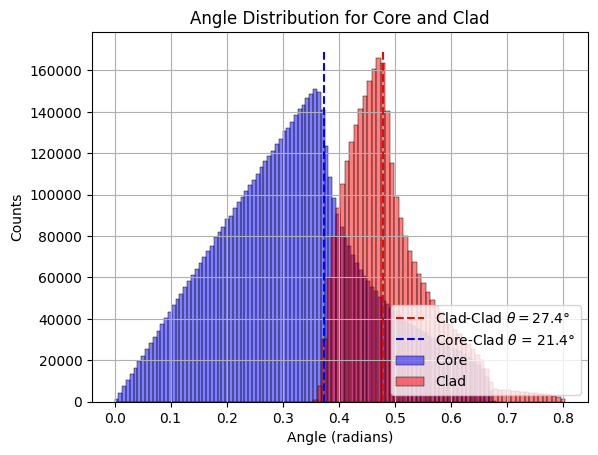

In [48]:
sns.histplot(data=sim_data_core, x="theta", bins=100, color="blue", alpha=0.5, label="Core")
sns.histplot(data=sim_data_clad, x="theta", bins=100, color="red", alpha=0.5, label="Clad")
plt.vlines(x = deg2rad(27.4), color = "red", linestyle = "--", label = r"Clad-Clad $\theta = 27.4°$", ymin = 0, ymax = 170000)
plt.vlines(x = deg2rad(21.4), color = "blue", linestyle = "--", label = r"Core-Clad $\theta$ = 21.4°", ymin = 0, ymax = 170000)
plt.xlabel("Angle (radians)")
plt.ylabel("Counts")
plt.title("Angle Distribution for Core and Clad")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

### 5)

We now determine the minimum distance of the photon to the center of the fiber (distance of two lines)

In [26]:
sim_data_core["t"] = -(sim_data_core["y_start"]*sim_data_core["py_start"] + sim_data_core["z_start"]*sim_data_core["pz_start"])/((sim_data_core["pz_start"])**2 + (sim_data_core["py_start"])**2)
sim_data_clad["t"] = -(sim_data_clad["y_start"]*sim_data_clad["py_start"] + sim_data_clad["z_start"]*sim_data_clad["pz_start"])/((sim_data_clad["pz_start"])**2 + (sim_data_clad["py_start"])**2)

/var/folders/1b/2klmrx_s0jl13t6zcmp2lt2m0000gn/T/ipykernel_1920/2428720012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_data_core["t"] = -(sim_data_core["y_start"]*sim_data_core["py_start"] + sim_data_core["z_start"]*sim_data_core["pz_start"])/((sim_data_core["pz_start"])**2 + (sim_data_core["py_start"])**2)
/var/folders/1b/2klmrx_s0jl13t6zcmp2lt2m0000gn/T/ipykernel_1920/2428720012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_data_clad["t"] = -(sim_data_clad["y_start"]*sim_data_clad["p

In [27]:
sim_data_core["minimum_distance"] = np.sqrt(sim_data_core["t"]**2 * (sim_data_core["pz_start"]**2 + sim_data_core["py_start"]**2))
sim_data_clad["minimum_distance"] = np.sqrt(sim_data_clad["t"]**2 * (sim_data_clad["pz_start"]**2 + sim_data_clad["py_start"]**2))

/var/folders/1b/2klmrx_s0jl13t6zcmp2lt2m0000gn/T/ipykernel_1920/3554622933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_data_core["minimum_distance"] = np.sqrt(sim_data_core["t"]**2 * (sim_data_core["pz_start"]**2 + sim_data_core["py_start"]**2))
/var/folders/1b/2klmrx_s0jl13t6zcmp2lt2m0000gn/T/ipykernel_1920/3554622933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_data_clad["minimum_distance"] = np.sqrt(sim_data_clad["t"]**2 * (sim_data_clad["pz_start"]**2 + sim_data_clad["py_start"]**

In [28]:
sim_data_core.describe()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center,theta,t,minimum_distance
count,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06,6434718.0,6.434718e+06,6.434718e+06,6.434718e+06,6434718.0,6434718.0,6.434718e+06,6.434718e+06,6.434718e+06,6.434718e+06
mean,-1.910724e-05,8.134303e-06,1.154402e+03,-4.017756e-05,1.102430e-05,9.404961e-01,1.235615e-04,-1.306116e-04,2.745690e+03,0.0,4.860629e+02,1.155211e+03,1.230348e+03,0.0,0.0,7.862670e-02,3.198367e-01,-1.029575e-04,4.222625e-02
std,5.828165e-02,5.827839e-02,6.928405e+02,5.783228e-02,5.782479e-02,4.604527e-02,2.380499e-01,2.380739e-01,3.580666e+03,0.0,3.903679e+01,6.924769e+02,7.419263e+02,0.0,0.0,2.471764e-02,1.366188e-01,4.743939e-01,2.766658e-02
min,-1.099902e-01,-1.099972e-01,7.324200e-04,-1.099965e-01,-1.099951e-01,7.769067e-01,-6.279620e-01,-6.263359e-01,0.000000e+00,0.0,4.072033e+02,1.000000e+02,7.887900e-04,0.0,0.0,2.937115e-05,0.000000e+00,-1.984424e+02,1.066146e-08
25%,-4.905987e-02,-4.900645e-02,5.000660e+02,-4.838681e-02,-4.831145e-02,9.209173e-01,-1.824408e-01,-1.827669e-01,7.910000e+02,0.0,4.567836e+02,5.000000e+02,5.858083e+02,0.0,0.0,6.300444e-02,2.238302e-01,-1.268811e-01,1.881782e-02
50%,-5.176500e-05,1.386000e-05,1.100002e+03,-2.180500e-05,2.641000e-05,9.499236e-01,1.093000e-05,-2.118300e-04,1.788000e+03,0.0,4.784689e+02,1.100000e+03,1.175847e+03,0.0,0.0,8.487906e-02,3.178051e-01,-3.005128e-05,3.888038e-02
75%,4.904413e-02,4.904507e-02,1.700048e+03,4.827822e-02,4.835526e-02,9.750544e-01,1.827007e-01,1.825486e-01,3.393000e+03,0.0,5.071938e+02,1.700000e+03,1.848360e+03,0.0,0.0,9.888898e-02,4.003687e-01,1.268350e-01,6.266329e-02
max,1.099962e-01,1.099950e-01,2.499991e+03,1.099974e-01,1.099936e-01,1.000000e+00,6.261271e-01,6.265129e-01,1.175689e+06,0.0,6.525288e+02,2.400000e+03,3.188698e+03,0.0,0.0,1.100000e-01,6.810586e-01,2.625059e+02,1.099990e-01


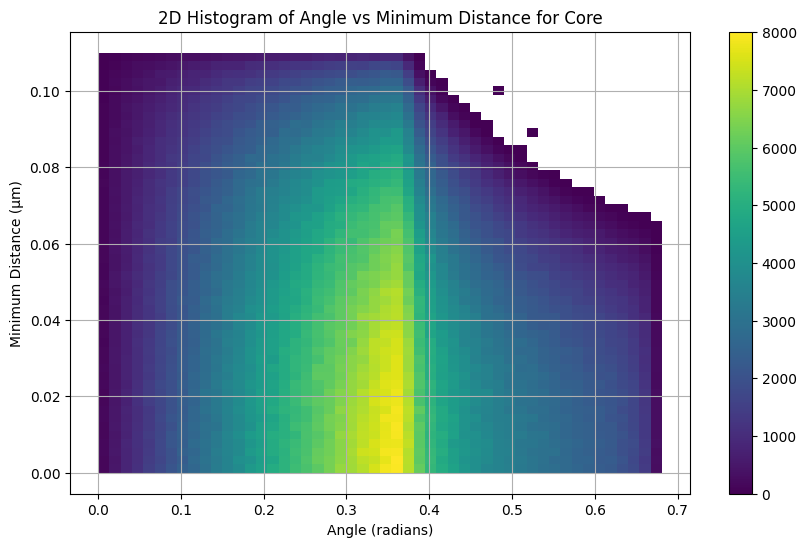

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sim_data_core, x="theta", y="minimum_distance", bins=50, cbar=True, cmap="viridis")
plt.xlabel("Angle (radians)")
plt.ylabel("Minimum Distance (µm)")
plt.title("2D Histogram of Angle vs Minimum Distance for Core")
plt.grid()
plt.show()

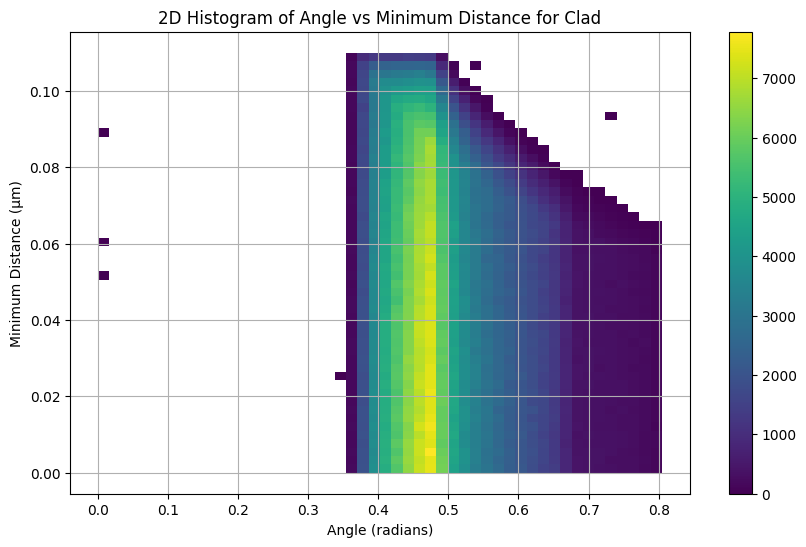

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sim_data_clad, x="theta", y="minimum_distance", bins=50, cbar=True, cmap="viridis")
plt.xlabel("Angle (radians)")
plt.ylabel("Minimum Distance (µm)")
plt.title("2D Histogram of Angle vs Minimum Distance for Clad")
plt.grid()
plt.show()

### 6)

We create a histogram of the intensity to the x position, for each quartile of the theta values.

In [31]:
sim_data

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center,theta
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0,0.067266,0.322539
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0,0.075127,0.210985
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0,0.081994,0.407948
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0,0.107741,0.483063
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0,0.066699,0.240377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12189,-0.093757,0.036602,200.005493,-0.086116,-0.020527,0.825783,0.075113,-0.558964,1037.0,0.0,439.064972,200.0,242.201111,0.000000,0.0,0.100649,0.599208
12190,-0.046607,0.029443,199.925171,-0.036812,-0.031668,0.951252,-0.265641,-0.156699,296.0,0.0,477.273438,200.0,210.170227,0.000000,0.0,0.055128,0.313526
12191,0.106568,0.010214,200.010742,-0.091458,-0.051768,0.856789,0.352222,-0.376632,1475.0,0.0,452.089111,200.0,233.438522,0.000000,0.0,0.107056,0.541785
12192,0.080448,-0.062861,200.003174,0.107887,-0.000503,0.994160,-0.050281,0.095482,197.0,0.0,434.581573,200.0,201.177856,0.000000,0.0,0.102095,0.108122


In [32]:
def split_by_theta(data, n):
    """
    Splits the DataFrame into n splits of increasing theta.
    Returns a list of DataFrames, each corresponding to a split.
    """
    quantiles = [data["theta"].quantile(i / n) for i in range(n + 1)]
    splits = []
    for i in range(n):
        lower = quantiles[i]
        upper = quantiles[i + 1]
        if i == 0:
            split = data[data["theta"] < upper]
        elif i == n - 1:
            split = data[data["theta"] >= lower]
        else:
            split = data[(data["theta"] >= lower) & (data["theta"] < upper)]
        split.reset_index(drop=True, inplace=True)
        splits.append(split)
    return splits

In [33]:
data_splits = split_by_theta(sim_data, 10)

In [34]:
data_splits[0]

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,distance_to_center,theta
0,0.063219,-0.034987,2399.991455,-0.033874,0.094850,0.991617,-0.032883,0.124957,1426.0,0.0,476.421478,2400.0,2420.287109,0.0,0.0,0.072255,0.129573
1,0.012032,-0.016513,2399.982422,0.048780,0.076249,0.993210,0.048998,0.105518,1286.0,0.0,534.036194,2400.0,2416.396484,0.0,0.0,0.020431,0.116603
2,-0.037243,0.076940,876.323944,0.045222,-0.085247,0.988532,-0.085307,-0.124611,967.0,0.0,492.266541,2400.0,886.486389,0.0,0.0,0.085480,0.151594
3,0.015668,0.002480,2400.021240,0.008142,-0.017118,0.988984,-0.145686,0.026188,1649.0,0.0,460.554413,2400.0,2426.806396,0.0,0.0,0.015863,0.148567
4,0.056440,-0.047054,2400.001099,0.070800,0.041244,0.997018,0.067239,-0.037862,1102.0,0.0,517.839783,2400.0,2407.147949,0.0,0.0,0.073481,0.077243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945953,0.003632,-0.084606,200.003174,0.050296,0.021458,0.997367,-0.009218,0.071926,75.0,0.0,442.724213,200.0,200.531189,0.0,0.0,0.084684,0.072579
945954,0.070793,-0.014108,199.970825,-0.027807,0.069479,0.995538,0.051150,0.079292,104.0,0.0,475.006958,200.0,200.867203,0.0,0.0,0.072185,0.094500
945955,-0.019973,0.065725,199.969238,-0.030445,0.092028,0.992204,-0.109895,0.058766,144.0,0.0,444.101013,200.0,201.539978,0.0,0.0,0.068693,0.124945
945956,-0.002147,0.081542,200.006348,0.001509,-0.080321,0.994710,-0.005129,-0.102598,94.0,0.0,458.354706,200.0,201.070129,0.0,0.0,0.081571,0.102908


In [35]:
from scipy.optimize import curve_fit

# Now we create histograms of the gpsPosX and fits to find the attenuation lengths for each quartile
# Define the exponential decay function
def exponential_decay(x, I0, attenuation_length):
    return I0 * np.exp(-x / attenuation_length)


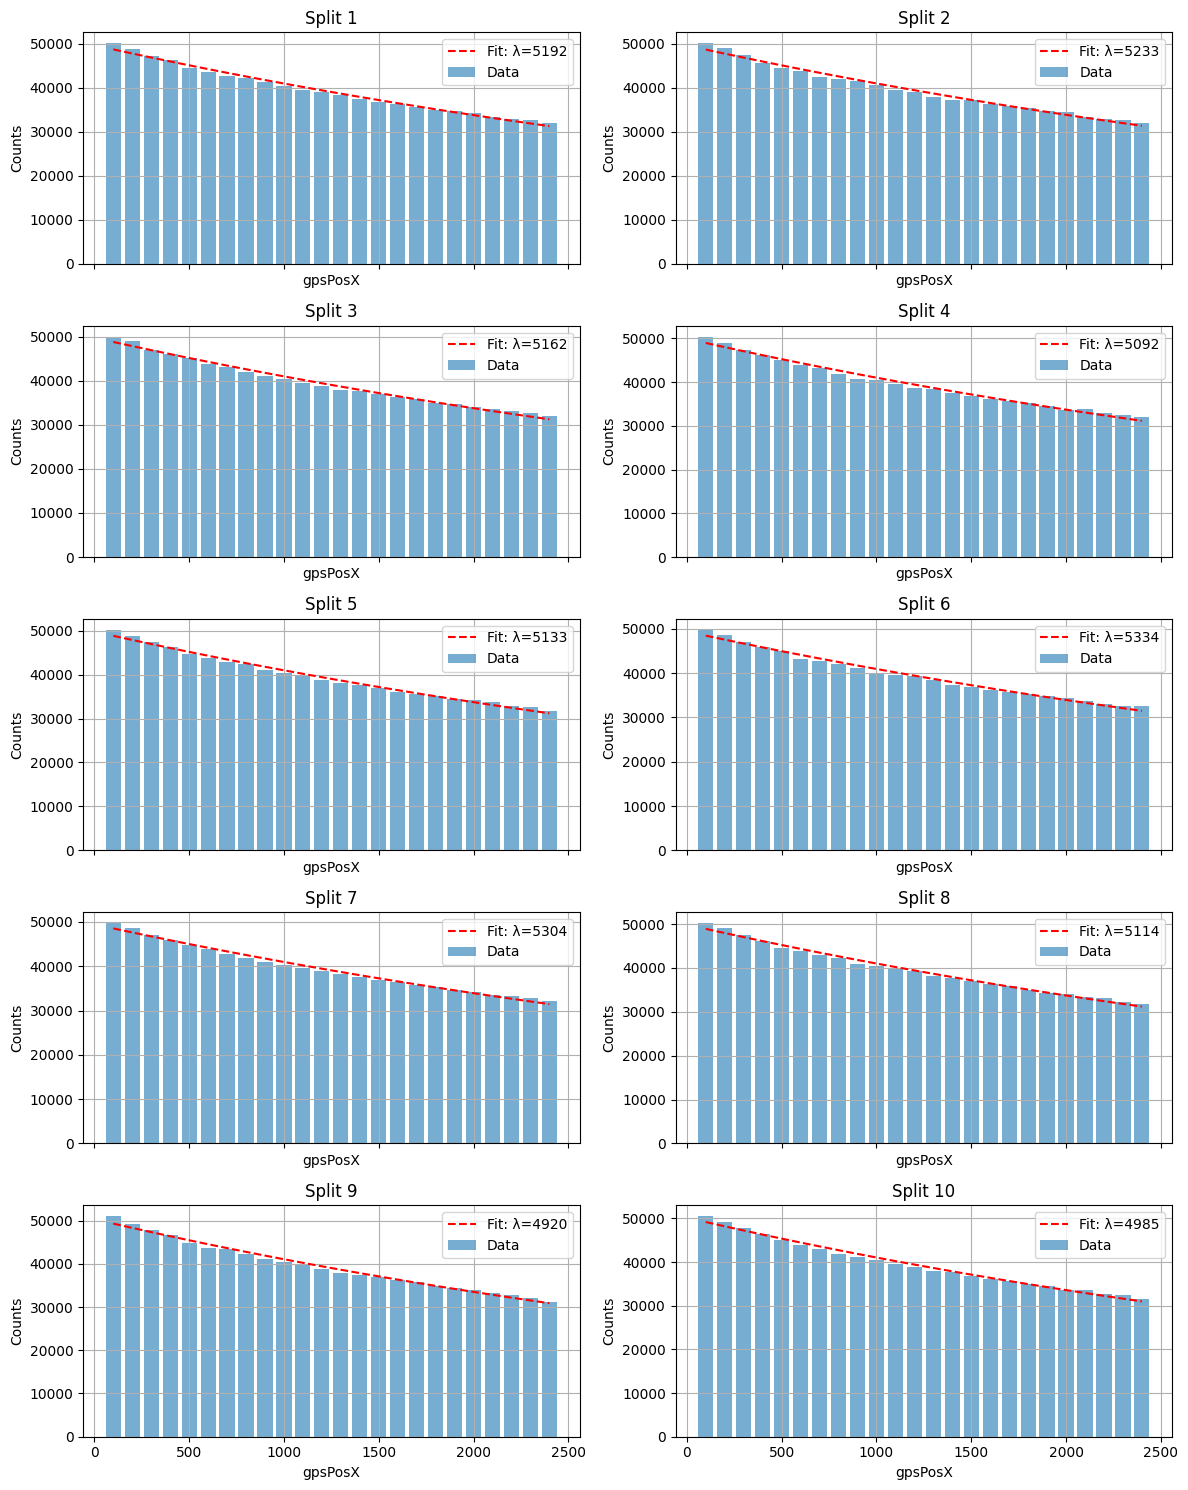

In [36]:
# Create a grid of histograms for each split of gpsPosX with exponential fit

num_splits = len(data_splits)
ncols = 2
nrows = (num_splits + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 3), sharex=True)
axes = axes.flatten()

for idx, split in enumerate(data_splits):
    # Bin gpsPosX and count photons
    counts = split.groupby("gpsPosX").size().reset_index(name="Counts")
    if len(counts) < 2:
        continue  # Not enough points to fit

    # Fit exponential decay
    try:
        popt, _ = curve_fit(exponential_decay, counts["gpsPosX"], counts["Counts"], p0=(counts["Counts"].max(), 1000))
        fit_label = f"Fit: λ={popt[1]:.0f}"
    except Exception:
        popt = None
        fit_label = "Fit failed"

    ax = axes[idx]
    ax.bar(counts["gpsPosX"], counts["Counts"], width=80, alpha=0.6, label="Data")
    if popt is not None:
        x_fit = np.linspace(counts["gpsPosX"].min(), counts["gpsPosX"].max(), 100)
        ax.plot(x_fit, exponential_decay(x_fit, *popt), 'r--', label=fit_label)
    ax.set_title(f"Split {idx+1}")
    ax.set_xlabel("gpsPosX")
    ax.set_ylabel("Counts")
    ax.legend()
    ax.grid()

# Hide unused subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 5.4 Intensity Measurement

Here we simply determine the attenuation length of the fiber.

We first read the data from the files

In [37]:
intensity_folder = "KoenRiana_intensity"

file_name = os.path.join(intensity_folder, "Attenuation_h=*.txt")

# Get only the files that match the file name
file_list = glob.glob(file_name)
intensity_data = None

for file in file_list:
    df = pd.read_csv(file, skiprows=1, sep="\t", names=["wavelength (nm)", "Counts"])
    df["vert_angle"] = float(file.split("_")[3].split("deg")[0][2:])
    df["hor_angle"] = float(file.split("_")[2].split("deg")[0][2:])
    df["x_position"] = float(file.split("_")[4].split("mm")[0][2:])
    intensity_data = pd.concat([intensity_data, df], ignore_index=True) if intensity_data is not None else df

dark_counts_file_name = os.path.join(intensity_folder, "DarkCounts_h=*.txt")
dark_counts_file_list = glob.glob(dark_counts_file_name)
dark_counts_data = None

for file in dark_counts_file_list:
    df = pd.read_csv(file, skiprows=1, sep="\t", names=["wavelength (nm)", "Dark counts"])
    df["vert_angle"] = float(file.split("_")[3].split("deg")[0][2:])
    dark_counts_data = pd.concat([dark_counts_data, df], ignore_index=True) if dark_counts_data is not None else df


In [38]:
intensity_data = intensity_data.merge(dark_counts_data, on=["wavelength (nm)", "vert_angle"], how="left")

In [39]:
intensity_data["Counts"] = intensity_data["Counts"] - intensity_data["Dark counts"]
intensity_data = intensity_data.drop(columns=["Dark counts"])

In [40]:
intensity_data.describe()

,wavelength (nm),Counts,vert_angle,hor_angle,x_position
count,409600.000000,409600.000000,409600.000000,409600.0,409600.000000
mean,641.644281,14.096317,13.000000,0.0,950.000000
std,268.571190,37.176640,11.489139,0.0,576.628834
min,208.295000,-127.000000,-5.000000,0.0,0.000000
25%,408.129500,-2.600000,3.000000,0.0,475.000000
50%,617.691500,2.400000,13.000000,0.0,950.000000
75%,879.213750,9.200000,23.000000,0.0,1425.000000
max,1131.010000,288.400000,31.000000,0.0,1900.000000


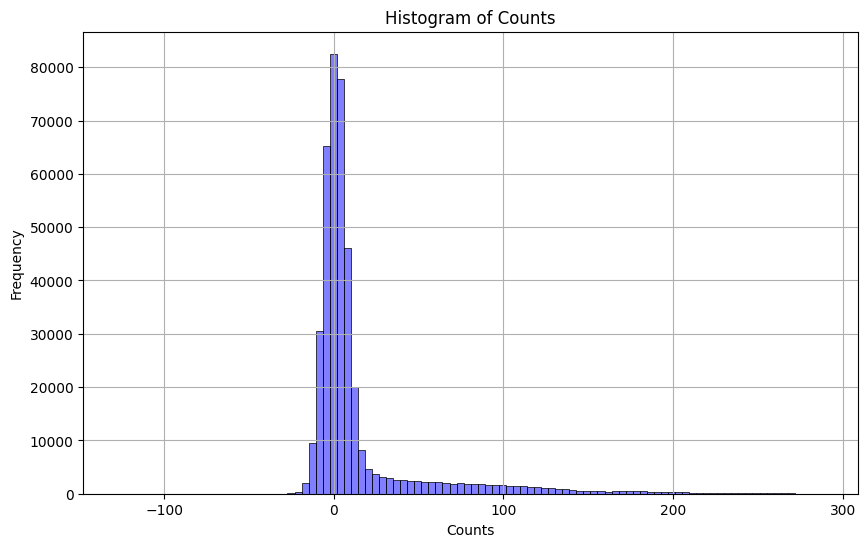

In [41]:
# Histogram of the counts
plt.figure(figsize=(10, 6))
sns.histplot(data=intensity_data, x="Counts", bins=100, color="blue", alpha=0.5)
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.title("Histogram of Counts")
plt.grid()
plt.show()

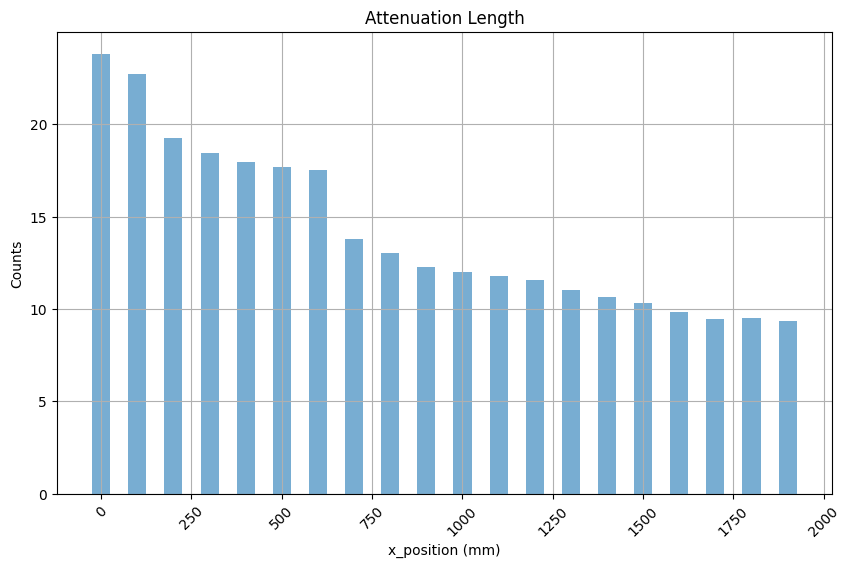

In [42]:
# Group the data by x_position and calculate the mean Counts
grouped_data = intensity_data.groupby("x_position")["Counts"].mean().reset_index()


# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.bar(x=grouped_data["x_position"], height=grouped_data["Counts"], width=50, alpha=0.6, label="Data")
plt.xlabel("x_position (mm)")
plt.ylabel("Counts")
plt.title("Attenuation Length")
plt.xticks(rotation=45)
plt.grid()
plt.show()

We seem to have three regions of interest, two of which we will consider: 
200-600 mm and 600-2000 mm.
We will not consider the region for 0-200 as we only have two data points there.

In [43]:
# We create the two splits of the data
first_split = grouped_data[grouped_data["x_position"] >= 200]
first_split = first_split[first_split["x_position"] <= 600]
second_split = grouped_data[grouped_data["x_position"] > 600]
# And for completeness we also create the zeroth split
zeroth_split = grouped_data[grouped_data["x_position"] < 200]

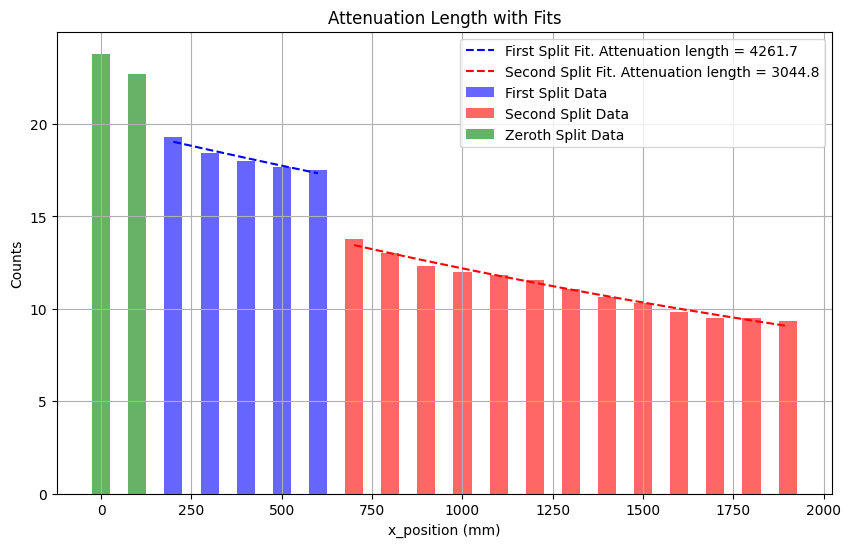

In [44]:
# We then create fits for the first and second splits
def fit_exponential_decay(data):
    # Fit the exponential decay function to the data
    popt, _ = curve_fit(exponential_decay, data["x_position"], data["Counts"], p0=(25, 3000))
    return popt

# Fit the first split
popt_first_split = fit_exponential_decay(first_split)
# Fit the second split
popt_second_split = fit_exponential_decay(second_split)

# We then plot the splits and the fits
plt.figure(figsize=(10, 6))
plt.bar(first_split["x_position"], first_split["Counts"], color="blue", label="First Split Data", width=50, alpha=0.6)
plt.bar(second_split["x_position"], second_split["Counts"], color="red", label="Second Split Data", width=50, alpha=0.6)
plt.bar(zeroth_split["x_position"], zeroth_split["Counts"], color="green", label="Zeroth Split Data", width=50, alpha=0.6)
plt.plot(first_split["x_position"], exponential_decay(first_split["x_position"], *popt_first_split), label=f"First Split Fit. Attenuation length = {popt_first_split[1]:.1f}", color="blue", linestyle="--")
plt.plot(second_split["x_position"], exponential_decay(second_split["x_position"], *popt_second_split), label=f"Second Split Fit. Attenuation length = {popt_second_split[1]:.1f}", color="red", linestyle="--")
plt.xlabel("x_position (mm)")
plt.ylabel("Counts")
plt.title("Attenuation Length with Fits")
plt.legend()
plt.grid()
plt.show()


In [45]:
# Calculate the average attenuation length
average_attenuation_length = (popt_first_split[1] + popt_second_split[1]) / 2
print(f"Average attenuation length: {average_attenuation_length:.2f} mm")

Average attenuation length: 3653.28 mm
